In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.spatial import distance
import math
import seaborn as sns
import pandas as pd
import os

%matplotlib inline

In [2]:
#### kernel
def my_kernel(x_n,x_m,params):##my_kernel(np.array([1,1,1]),np.array([2,5,3]),np.array([1,2,3]))
    part = params*(x_n-x_m)*(x_n-x_m)
    EXP = math.exp(-0.5*sum(part))
    return EXP

def D_t(time_i,time_j,epsilon=0.1):
    return math.pow(1-epsilon, 0.5*math.fabs(time_i-time_j))


def d_t(time, epsilon=0.1):
    T=30 ##日数
    return math.pow(1-epsilon, 0.5*math.fabs(T+1-time))
    
### Gaussian process
def cal_K(_x,_y,params=[1,1,1]):
    Kernel=np.array([my_kernel(i[1:],j[1:],params) for i in _x for j in _x])
    K = Kernel.reshape([_x.shape[0],_x.shape[0]])
    sigma = 0.001
    Noize = np.diag(np.random.normal(loc=0.0, scale=sigma, size=_x.shape[0]))
    return K+Noize

def pred(K,_x,_y,newpoint,params=[1,1,1]):
    ### gram matrix
    aux = np.array([my_kernel(i[1:],newpoint[1:],params) for i in _x])
    
    mu = np.dot(aux,np.dot(np.linalg.inv(K),_y))
    vari = my_kernel(newpoint,newpoint,params)-np.dot(aux,np.dot(np.linalg.inv(K+np.identity(len(_x))),aux))
    return (mu,vari)
##pred(np.array([np.array([1,2,3]),np.array([3,5,7]),np.array([3,6,2])]),np.array([23,6,4]),np.array([6,5,1]))

y_sum_max
22.934190938208353


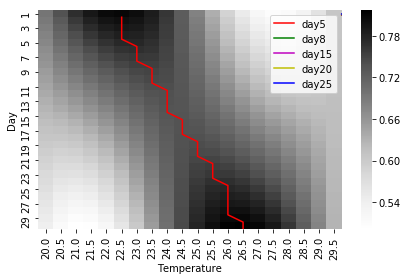

In [3]:
#適当な関数を定義
def generate_sample(t,x):
    G=np.exp(-t*0.1)+1.5
    A=1.0
    T=x
    Th=27
    f_temp_1 = 1.0/((1.0+np.exp(-0.5*A*(np.fabs(1-np.sin((T-29)*0.6))*1.5))))
    f_temp_2 = 1.0/((1.0+np.exp(-0.5*A*(np.fabs(1-np.sin((T-25)*0.6))*1.5))))
    return t/30 * f_temp_1 + (1-t/30) * f_temp_2
    
    ##return 40.0*math.sin((x[1])/10.0) + 0.01*math.pow(0.3*(x[1]-60.0),2)-1.0*math.fabs(x[1]+2.0)+np.random.normal(0,1,1) + math.sin(x[1]/10)*math.sin(x[0]/10) + 2*x[0]
"""
data = pd.read_csv("/Users/isokawakoki/plant_code/dataset/data.csv",encoding="UTF-8")
print(data)
sns.heatmap(data, cmap='cubehelix', vmin=np.min(data), vmax=np.max(data))
max_index, max_z = np.argmax(data), np.max(data)
##x_max, t_max = max_index % space_size[0], max_index // space_size[0]
##plt.plot(x_max, t_max, 'ro') #real_MAX
##print("f(max_t=%d, max_x=%d) = %.3f" % (t_max, x_max, max_z))
"""
##正しい値
t = np.arange(1, 31, 1)
x = np.arange(20, 30, 0.5)

X, T = np.meshgrid(x, t)
Z = generate_sample(T,X)

df = pd.DataFrame(data=Z, index=t, columns=x)
##plt.figure()
sns.heatmap(df,cmap='Greys')

space_size = np.shape(Z)

x_max = np.array([])
for i in range(30):
    max_index, max_z = np.argmax(Z[i]), np.max(Z[i])
    x_max = np.append(x_max, np.array([i,max_index]))
x_max = x_max.reshape((30,2))
plt.xlabel("Temperature")
plt.ylabel("Day")
plt.plot(x_max[:,1]+0.5, x_max[:,0]+1, 'r') 
#plt.show()
plt.tight_layout()
plt.savefig('real.png')


plt.plot(x,Z[5],'r',label='day5')# 本物の関数
plt.plot(x,Z[8],'g',label='day8')
plt.plot(x,Z[15],'m',label='day15')
plt.plot(x,Z[20],'y',label='day20')
plt.plot(x,Z[25],'b',label='day25')
plt.legend(loc = 'upper right')
#plt.show()
plt.tight_layout()
plt.savefig('real_cut.png')

y_max = 0
for i in range(30):
    y_max += np.max(Z[i])
print("y_sum_max")
print(y_max)
def maximum(x):
    return max(enumerate(x), key=lambda x: x[1])[0]

#### EI
def aqui1(mean,vari,qqq):
    lamb = (mean - qqq)/(vari*1.0)
    z = np.array([(mean[i] - qqq)*norm.cdf(lamb[i]) + vari[i]*norm.pdf(lamb[i]) for i in range(len(lamb))])
    return z

#### PI
def aqui2(mean,vari,qqq):
    lamb = (mean - qqq-0.01)/(vari*1.0)
    z = np.array([norm.cdf(lamb[i]) for  i in range(len(lamb))])
    return z
#### UCB
def aqui3(mean_vari,qqq):
    return mean_vari[:,0]+0.01*mean_vari[:,1]

y_sum
[20.23322519]
y_sum
[20.02541257]
finish training


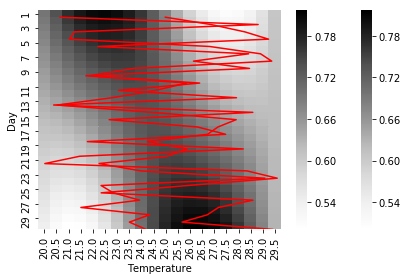

In [4]:
x_array = np.array([])
y_array = np.array([])
all_array = np.array([])

epoch=30
training=2

##TrainGP
for k in range(training):
    cycle_array = np.array([])
    y_sum = 0
    for day in range(epoch):
        x_point = np.array([day+1,np.random.uniform(20,30)])
        x_array = np.append(x_array,x_point) if x_array.size == 0 else np.vstack((x_array,x_point))
        y_point = generate_sample(x_point[0],x_point[1:]) + np.random.normal(0,0.01,1)
        y_sum += y_point
        y_array = np.append(y_array,y_point)
        yielding = np.append(x_point,y_point)
        cycle_array = np.append(cycle_array,yielding)
    
    cycle_array = cycle_array.reshape((epoch,yielding.size))
    all_array = cycle_array if all_array.size == 0 else np.vstack((all_array,cycle_array))

    df = pd.DataFrame(data=Z, index=t, columns=x)
    ##plt.figure()
    sns.heatmap(df,cmap='Greys')
    plt.xlabel("Temperature")
    plt.ylabel("Day")
    plt.plot(2*(cycle_array[:,1]-20), cycle_array[:,0], 'r') 
    #plt.show()
    plt.tight_layout()
    plt.savefig('training.png',bbox_inches="tight")
    print("y_sum")
    print(y_sum)
    

print("finish training")

day= 5


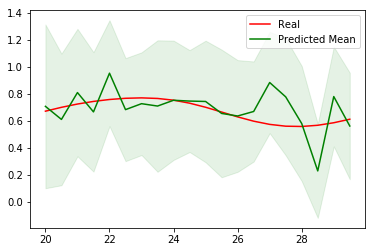

day= 25


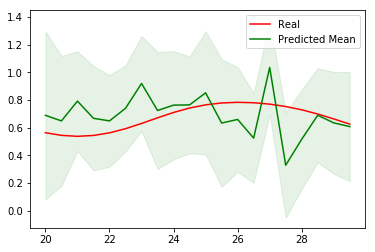

y_sum
4114.883569032537
finish


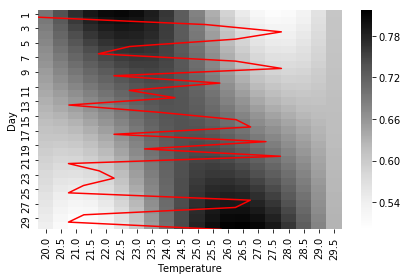

In [5]:
##BayesianOpt
N = 1

for n in range(N):
    cycle_array = np.array([])
    y_sum = 0.001
    for day in range(epoch):
        #Gaussian
        K = cal_K(x_array,y_array,params=[3])
        mean_vari = np.array([pred(K,x_array,y_array,np.array([day+1,j]),np.array([3])) for j in x ])
        qqq = max(y_array)
        #determine next point
        accui = aqui3(mean_vari,qqq)
        
        if day == 5 or day == 25:
            print("day=",day)
            plt.plot(x,Z[day],'r',label='Real') # 本物の関数
            mean = mean_vari[:,0]
            plt.plot(x,mean,'g',label='Predicted Mean') # 推測された平均
            std = np.sqrt(mean_vari[:,1]) # 各点の標準偏差は共分散行列の対角成分
            plt.fill_between(x,mean-std,mean+std,alpha=0.1,color='g') # 推測された標準偏差の中の領域
            plt.legend(loc = 'upper right')
            plt.show()
    
        x_point[0] = day+1 ##時間
        x_point[1] = x[[maximum(accui)%100]]+np.random.normal(0,0.01,1)
        ##print("next_x_point[time,x]")
        ##print(x_point)

        x_array = np.vstack((x_array,x_point))
        y_point = generate_sample(x_point[0],x_point[1]) + np.random.normal(0,0.01,1) ##experiment
        y_array = np.append(y_array,y_point)
        yielding = np.append(x_point,y_point)
        cycle_array = np.append(cycle_array,yielding)
        all_array = np.vstack((all_array,yielding))
        y_sum *= (1.0 + float(y_point))
    
    cycle_array = cycle_array.reshape((-1, yielding.size))
    
    ##y_sum = np.sum(cycle_array, axis=0)[2]
    print("y_sum")
    print(y_sum)
    
    df = pd.DataFrame(data=Z, index=t, columns=x)
    sns.heatmap(df,cmap='Greys')
    plt.xlabel("Temperature")
    plt.ylabel("Day")
    plt.plot(2*(cycle_array[:,1]-20), cycle_array[:,0], 'r') 
    plt.tight_layout()
    plt.savefig('normal_BO.png')
    ##plt.show()
    
print("finish")

時間変化に対応できていない